In [1]:
process = "WplusH_HToBB_WToLNu"

file_run3 = {
    "ggZH_HToBB_ZToLL" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/ggZH_HToBB_ZToLL_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221124_150340/0000/hadd.root",
    "ggZH_HToBB_ZToNuNu" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/ggZH_HToBB_ZToNuNu_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221124_124826/0000/hadd.root",
    "WminusH_HToBB_WToQQ" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/WminusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221124_141837/0000/hadd.root",
    "WplusH_HToBB_WToQQ" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/WplusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221128_130308/0000/hadd.root",
    "WplusH_HToBB_WToLNu" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/WplusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221129_162109/0000/hadd.root",
}

file_ul = {
    "ggZH_HToBB_ZToLL" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/ZHToBB/ZH_HToBB_ZToLL_M-125_TuneCP5_13TeV-powheg-pythia8/ZH_HToBB_ZToLL/220411_212229/0000/nano_mc2018_9.root",
    "ggZH_HToBB_ZToNuNu" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/ZHToBB/ggZH_HToBB_ZToNuNu_M-125_TuneCP5_13TeV-powheg-pythia8/ggZH_HToBB_ZToNuNu/220415_235627/0000/nano_mc2018_16.root",
    "WminusH_HToBB_WToQQ" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/WHToBB/WminusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/WminusH_HToBB_WToQQ/220528_123904/0000/nano_mc2018_91.root",
    "WplusH_HToBB_WToQQ" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/WHToBB/WplusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/WplusH_HToBB_WToQQ/220528_123846/0000/nano_mc2018_9.root",
    "WplusH_HToBB_WToLNu" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/WHToBB/WplusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8/WplusH_HToBB_WToLNu/220411_205948/0000/nano_mc2018_99.root",
}

In [2]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

run3 = NanoEventsFactory.from_root(
    file_run3[process],
    schemaclass=NanoAODSchema
).events()


ul = NanoEventsFactory.from_root(
    file_ul[process],
    schemaclass=NanoAODSchema
).events()

import warnings

warnings.filterwarnings("ignore", "RuntimeWarning: Missing cross-reference index for")
warnings.filterwarnings("ignore", "Found duplicate branch")

/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_genPartIdx => GenPart
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-refer

In [9]:
import matplotlib.pyplot as plt
import mplhep
from hist import Hist
import hist
import numpy as np
plt.style.use(mplhep.style.CMS)

def fill(var):
    return ak.to_numpy(var)

h_run3 = Hist(
    hist.axis.Regular(50, 0, 500, name="pt", label=r"Leading GenJet $p_T$"),
    hist.axis.Regular(50, -5, 5, name="eta", label=r"Leading GenJet $\eta$"),
    hist.axis.Regular(50, -4, 4, name="phi", label=r"Leading GenJet $\phi$"),
    hist.axis.Regular(50, 0, 100, name="mass", label=r"Leading GenJet mass"),
)

jet = ak.firsts(run3.GenJet)

h_run3.fill(fill(jet.pt), fill(jet.eta), fill(jet.phi), fill(jet.mass))

h_ul = Hist(
    hist.axis.Regular(50, 0, 500, name="pt", label=r"Leading GenJet $p_T$"),
    hist.axis.Regular(50, -5, 5, name="eta", label=r"Leading GenJet $\eta$"),
    hist.axis.Regular(50, -4, 4, name="phi", label=r"Leading GenJet $\phi$"),
    hist.axis.Regular(50, 0, 100, name="mass", label=r"Leading GenJet mass"),
)

jet = ak.firsts(ul.GenJet)

h_ul.fill(fill(jet.pt), fill(jet.eta), fill(jet.phi), fill(jet.mass))

Hist(
  Regular(50, 0, 500, name='pt', label='Leading GenJet $p_T$'),
  Regular(50, -5, 5, name='eta', label='Leading GenJet $\\eta$'),
  Regular(50, -4, 4, name='phi', label='Leading GenJet $\\phi$'),
  Regular(50, 0, 100, name='mass', label='Leading GenJet mass'),
  storage=Double()) # Sum: 17458.0 (17498.0 with flow)

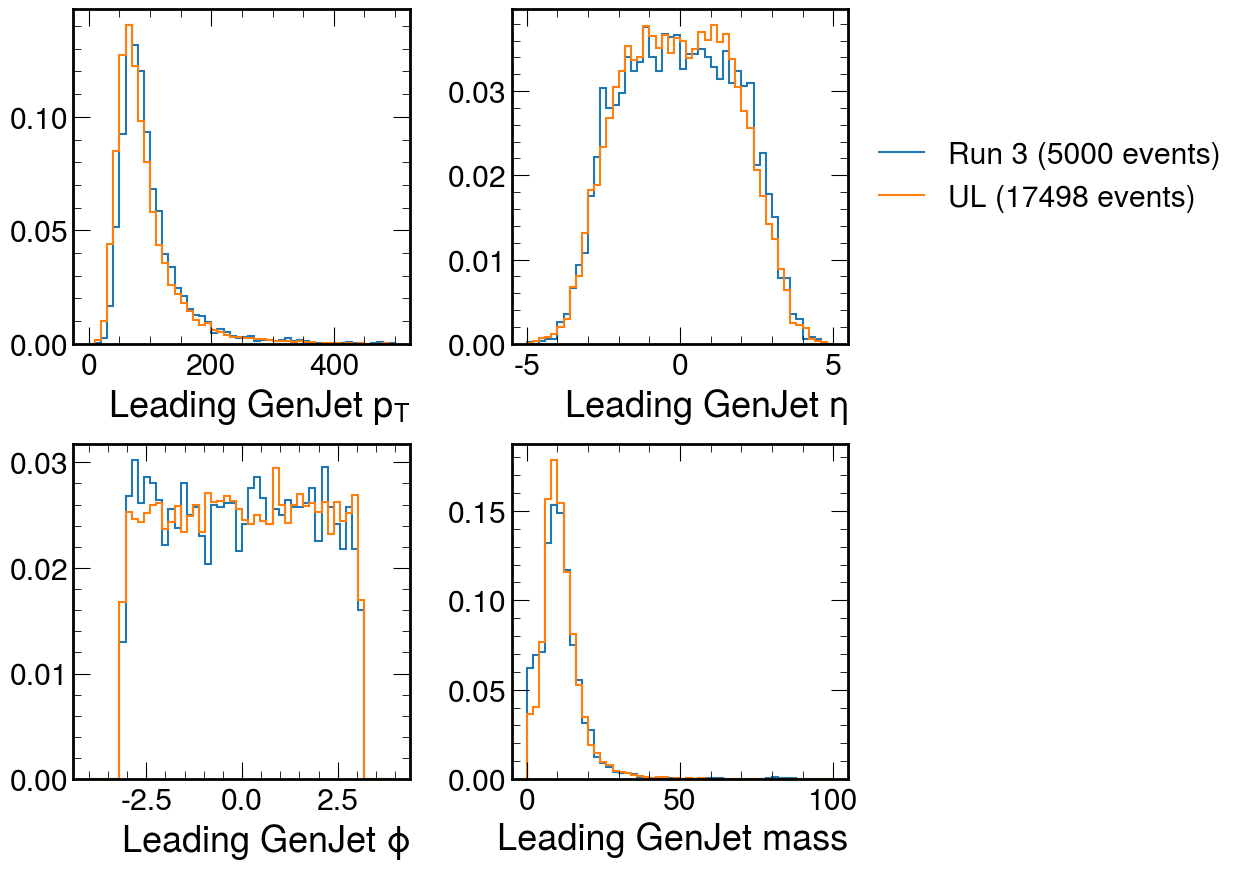

In [10]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=.3, wspace=.3)


row, column = 0, 0

for var in ["pt", "eta", "phi", "mass"]:
    
    if column > 1:
        row = 1
        column = 0

    mplhep.histplot(h_run3.project(var)*(1/h_run3.project(var)[{var : sum}]), ax = axs[row, column], label = "Run 3 ({0} events)".format(ak.sum(run3.run)))
    mplhep.histplot(h_ul.project(var)*(1/h_ul.project(var)[{var : sum}]), ax = axs[row, column], label = "UL ({0} events)".format(ak.sum(ul.run)))
    
    column += 1

lgd = axs[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.savefig('{0}.pdf'.format(process), bbox_extra_artists=(lgd,), bbox_inches='tight')